# 02 - Model Training and Comparison

In this notebook, you'll build, train, and evaluate several regression models to predict CO2 emission per capita. We'll use preprocessing utilities from the `src/data_preprocessing.py` script for a clean workflow.

## 1. Setup and Data Preparation

In [1]:
# Import standard libraries
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Import preprocessing utilities
import sys
sys.path.append('../src')
from data_preprocessing import load_data, train_test_split_processed

# Load and preprocess data
df = load_data('../data/carbon_emission_ml_dataset.csv')
X_train, X_test, y_train, y_test, preprocessor, feature_names = train_test_split_processed(df)

## 2. Model Initialization

In [2]:
# Import models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import lightgbm as lgb

# Set up models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': xgb.XGBRegressor(n_estimators=100, random_state=42, verbosity=0),
    'LightGBM': lgb.LGBMRegressor(n_estimators=100, random_state=42)
}

/Library/anaconda3/envs/new_en/lib/python3.9/site-packages/dask/dataframe/__init__.py:31: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


## 3. Training and Evaluation Functions

In [3]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    return rmse, r2

results = []

## 4. Model Training and Results Collection

In [5]:
# Train each model and record results
for name, model in models.items():
    model.fit(X_train, y_train)
    rmse, r2 = evaluate_model(model, X_test, y_test)
    results.append({
        'Model': name,
        'RMSE': rmse,
        'R2': r2
    })

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000051 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 130
[LightGBM] [Info] Number of data points in the train set: 80, number of used features: 6
[LightGBM] [Info] Start training from score 9.752500
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

## 5. Results Summary

In [6]:
results_df = pd.DataFrame(results).sort_values(by='RMSE')
results_df

,Model,RMSE,R2
0,Linear Regression,0.442801,0.993402
7,Linear Regression,0.442801,0.993402
1,Ridge Regression,0.985884,0.967294
8,Ridge Regression,0.985884,0.967294
2,Lasso Regression,1.300150,0.943120
9,Lasso Regression,1.300150,0.943120
4,Random Forest,1.379221,0.935991
11,Random Forest,1.379221,0.935991
5,XGBoost,2.184539,0.839420
12,XGBoost,2.184539,0.839420


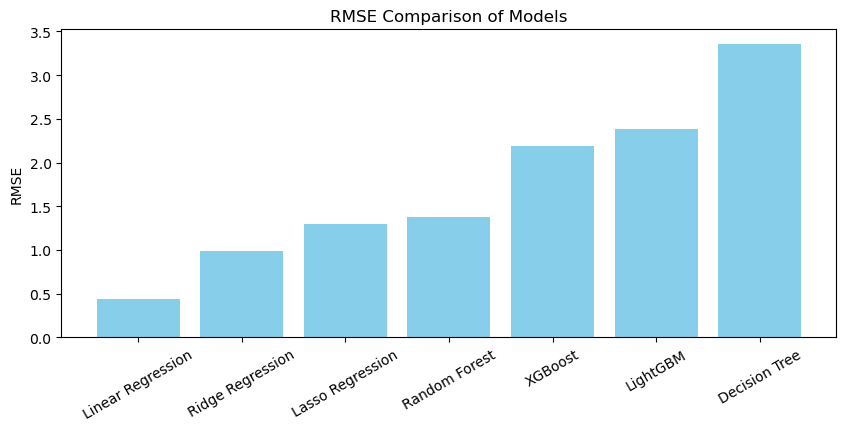

In [7]:
# Bar plot for visual comparison
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.bar(results_df['Model'], results_df['RMSE'], color='skyblue')
plt.ylabel('RMSE')
plt.title('RMSE Comparison of Models')
plt.xticks(rotation=30)
plt.show()

## 6. Feature Importance (Optional & Advanced)

Let's examine feature importance for tree-based models.

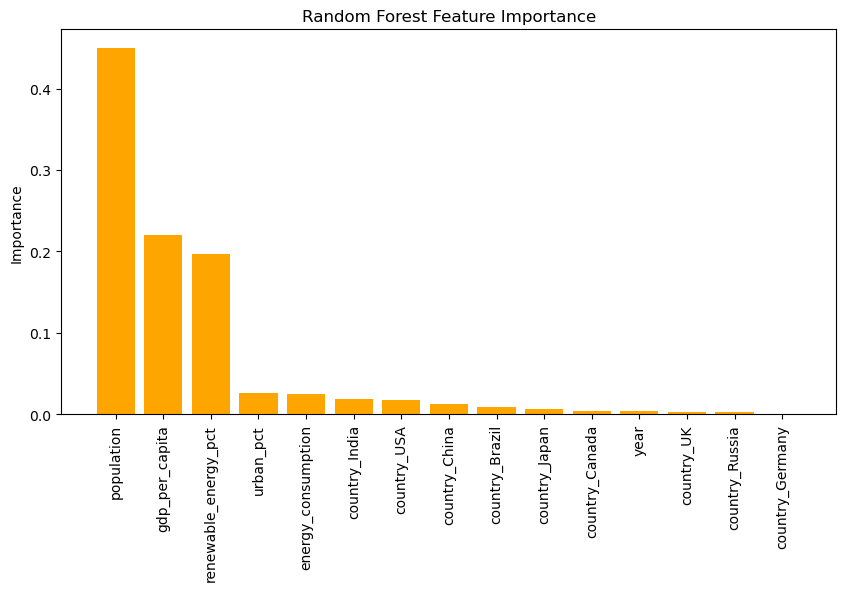

In [8]:
# Example: Feature importance for Random Forest
rf = models['Random Forest']
importances = rf.feature_importances_

imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
imp_df = imp_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,5))
plt.bar(imp_df['Feature'], imp_df['Importance'], color='orange')
plt.title('Random Forest Feature Importance')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.show()

## 7. Insights and Next Steps

- Review which models performed best and why.
- Examine which features are most important for predictions (see above).
- Try tuning model hyperparameters for improved results.
- Next: add more advanced evaluation, cross-validation, or deploy your best model!